In [73]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

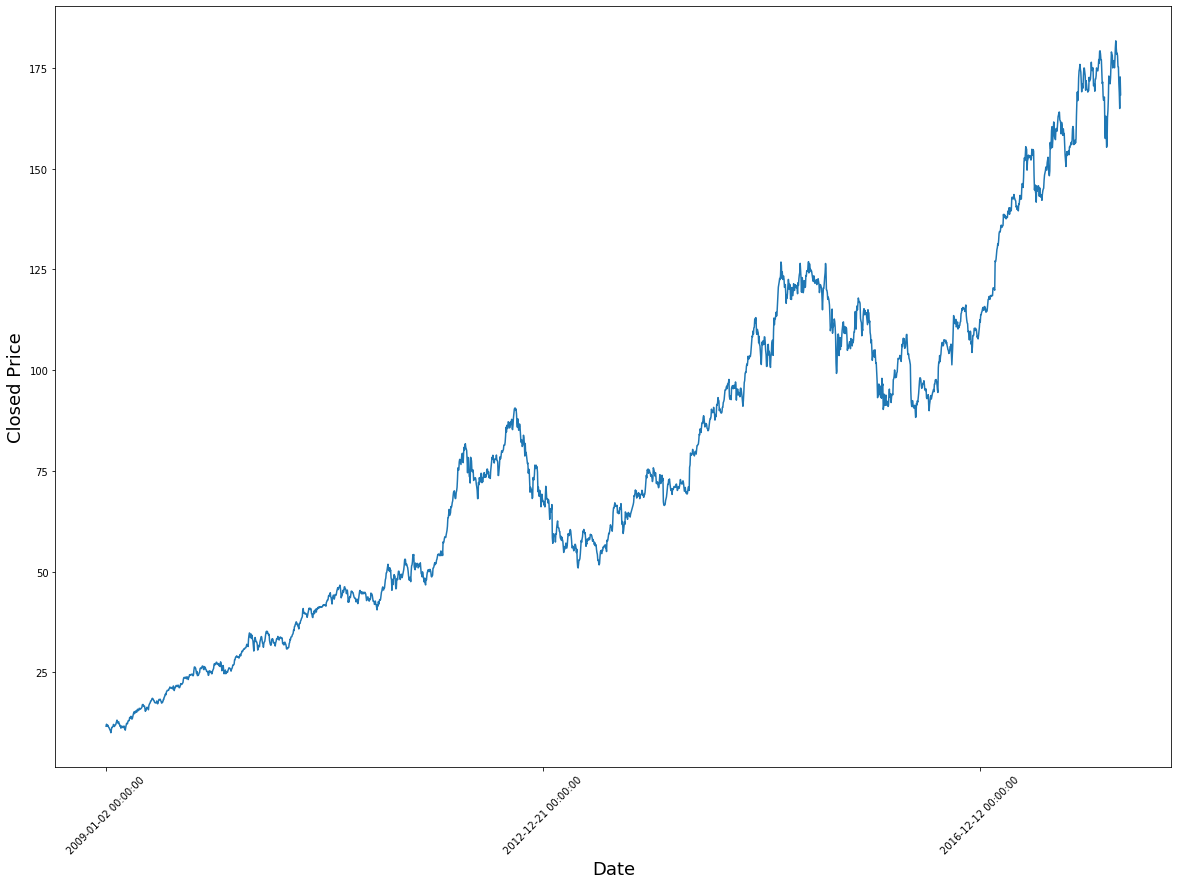

In [74]:
quandl.ApiConfig.api_key = "uRMo697HgMj91ZZZa2_v"
data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'adj_close','open','high','low','close'] }, ticker = ['AAPL'], date = { 'gte': '2009-01-01', 'lte': '2019-12-19' })
data.sort_values(by='date', ascending=True,inplace =True)
data = data.dropna()
data_1 = data.iloc[:1956]
data_2 = data[1956:]###365
plt.figure(figsize = (20,14))
plt.plot(range(data.shape[0]),(data['adj_close']))
plt.xticks(range(0,data.shape[0],1000),data['date'].loc[::1000],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closed Price',fontsize=18)
plt.show()

,ticker,date,adj_close,open,high,low,close
None,,,,,,,
2321,AAPL,2009-01-02,11.662640,85.88,91.04,85.16,90.75
2320,AAPL,2009-01-05,12.154848,93.17,96.18,92.71,94.58
2319,AAPL,2009-01-06,11.954366,95.95,97.17,92.39,93.02
2318,AAPL,2009-01-07,11.696053,91.81,92.50,90.26,91.01
2317,AAPL,2009-01-08,11.913242,90.43,93.15,90.04,92.70


In [110]:
training_set = data_1.iloc[:,2:].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


X = []
y = []
for i in range(30, len(training_set_scaled)):
    X.append(training_set_scaled[i-30:i])
    y.append(training_set_scaled[i,0])

X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 5))

In [93]:
X.shape

(1926, 30, 5)

In [100]:
dataset_total = data.iloc[:,2:]
inputs = dataset_total[len(dataset_total) - len(data_2) -30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

X_test = []
for i in range(30, len(inputs)):
    X_test.append(inputs[i-30:i,0])

X_test= np.array(X_test)

In [108]:
real_stock_price = data_2.iloc[:,2:3].values

dataset_total = data.iloc[:,2:]
inputs = dataset_total[len(dataset_total) - len(data_2) -30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

X_test = []
for i in range(30, len(inputs)):
    X_test.append(inputs[i-30:i,0])

X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
X_test.shape

(1950, 30)

In [111]:
X.shape[1],1

(30, 1)

In [112]:
X.shape[1],5

(30, 5)

In [113]:
from keras import metrics

In [118]:
metrics.l1

AttributeError: module 'keras.metrics' has no attribute 'l1'